In [40]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

In [41]:
# Генерируем уникальный seed
my_code = "Романенков"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [42]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [43]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [44]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [45]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [46]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [47]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [48]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [49]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.300529,0.407767,0.405455,0.462838,0.733912,0.551393,Bream
1,0.002372,0.075728,0.065455,0.074324,0.027363,0.014208,Smelt
2,0.559029,0.557282,0.565455,0.616554,1.0,0.803747,Bream
3,0.0694,0.242718,0.247273,0.248311,0.256897,0.332643,Perch
4,0.233623,0.427184,0.423636,0.442568,0.455246,0.607155,Roach
...,...,...,...,...,...,...,...
90,0.04507,0.18835,0.192727,0.192568,0.229028,0.282279,Perch
91,0.003832,0.08932,0.083636,0.084459,0.03163,0.029347,Smelt
92,0.217201,0.365049,0.374545,0.41723,0.645956,0.480365,Bream
93,0.178882,0.320388,0.32,0.341216,0.565911,0.449143,Parkki


In [50]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [51]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Width', 'Weight', 'Length2']
Length1


In [52]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [53]:
x_train

,Width,Weight,Length2
0,0.551393,0.300529,0.405455
1,0.014208,0.002372,0.065455
2,0.803747,0.559029,0.565455
3,0.332643,0.0694,0.247273
4,0.607155,0.233623,0.423636
...,...,...,...
90,0.282279,0.04507,0.192727
91,0.029347,0.003832,0.083636
92,0.480365,0.217201,0.374545
93,0.449143,0.178882,0.32


In [54]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.

In [55]:
r_model1 = DecisionTreeRegressor(criterion='squared_error')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)

r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)

for model in r_models:
    model.fit(x_train, y_train)

In [56]:
mse_list = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mse_list.append(mse)
    print(mse)

0.0004969836930907714
0.03612128865916124
0.03532861249882175
0.0017785606560467514


In [57]:
print("Модель с минимальной среднеквадратичной MSE: ", mse_list.index(min(mse_list))+1)

Модель с минимальной среднеквадратичной MSE:  1


In [58]:
i_min = mse_list.index(min(mse_list))
r_model = r_models[i_min]
r_model.get_params()

test_pred = r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.0007907201432745779


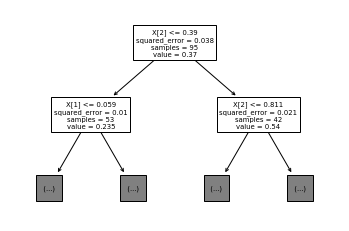

In [59]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(r_model, max_depth=1)
plt.show()

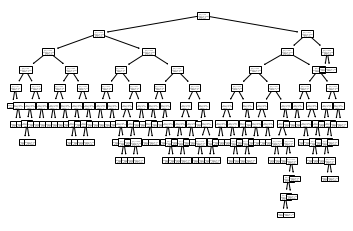

In [60]:
plot_tree(r_model)
plt.show()

In [61]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [62]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Length3', 'Length2']
Species


In [63]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [64]:
x_train

,Length3,Length2
0,0.462838,0.405455
1,0.074324,0.065455
2,0.616554,0.565455
3,0.248311,0.247273
4,0.442568,0.423636
...,...,...
90,0.192568,0.192727
91,0.084459,0.083636
92,0.41723,0.374545
93,0.341216,0.32


In [65]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.

In [66]:
d_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)

d_models = []
d_models.append(d_model1)
d_models.append(d_model2)
d_models.append(d_model3)
d_models.append(d_model4)

for model in d_models:
    model.fit(x_train, y_train)

In [67]:
f1_list = []
for model in d_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1_list.append(f1)
    print(f1)

0.5808333333333333
0.6271512681159421
0.6354101966873706
0.6489583333333333


In [68]:
print("Модель с максимальным значением F1: ", f1_list.index(max(f1_list))+1)

Модель с максимальным значением F1:  4


In [71]:
i_max = f1_list.index(max(f1_list))
d_model = d_models[i_max]
d_model.get_params()
      
test_pred = d_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average='weighted')
print(f1)

0.5439236111111111


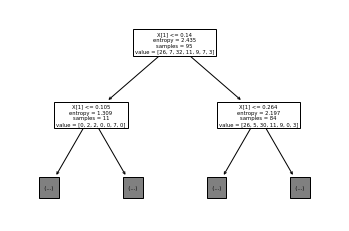

In [72]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(d_model, max_depth=1)
plt.show()

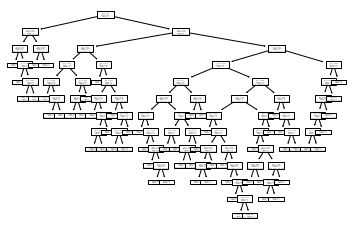

In [73]:
plot_tree(d_model)
plt.show()